## BlackSheep Cookbook MSI Upregulation

The Black Sheep Analysis allows researchers to find trends in abnormal protein enrichment among patients in CPTAC datasets. In this Cookbook, we will go through the steps needed to perform a full Black Sheep Analysis, to answer a research question, of if BMI, age, or country of origin play a role in protein enrichments for patients with Endometrial Cancer.

### Step 1a: Import Dependencies
First, import the necessary dependencies and install cptac through pip.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cptac
import binarization_functions as bf
import blackSheepCPTACmoduleCopy as blsh
en = cptac.Endometrial()

Checking that data files are up-to-date...
100% [..................................................................................] 649 / 649
Data check complete.
endometrial data version: 2.1

Loading acetylproteomics data...
Loading clinical data...
Loading CNA data...
Loading definitions data...
Loading miRNA data...
Loading phosphoproteomics_gene data...
Loading phosphoproteomics_site data...
Loading proteomics data...
Loading somatic data...
Loading somatic_binary data...
Loading transcriptomics_circular data...
Loading transcriptomics_linear data...

 ******PLEASE READ******
CPTAC is a community resource project and data are made available
rapidly after generation for community research use. The embargo
allows exploring and utilizing the data, but analysis may not be
published until July 1, 2019. Please see
https://proteomics.cancer.gov/data-portal/about/data-use-agreement or
enter cptac.embargo() to open the webpage for more details.


## Step 1b: Load Data and Choose Omics Table

In [3]:
en = cptac.Endometrial()
proteomics = en.get_proteomics()
mRNA = en.get_transcriptomics()
clinical = en.get_clinical()

Checking that data files are up-to-date...
100% [..................................................................................] 649 / 649
Data check complete.
endometrial data version: 2.1

Loading acetylproteomics data...
Loading clinical data...
Loading CNA data...
Loading definitions data...
Loading miRNA data...
Loading phosphoproteomics_gene data...
Loading phosphoproteomics_site data...
Loading proteomics data...
Loading somatic data...
Loading somatic_binary data...
Loading transcriptomics_circular data...
Loading transcriptomics_linear data...

 ******PLEASE READ******
CPTAC is a community resource project and data are made available
rapidly after generation for community research use. The embargo
allows exploring and utilizing the data, but analysis may not be
published until July 1, 2019. Please see
https://proteomics.cancer.gov/data-portal/about/data-use-agreement or
enter cptac.embargo() to open the webpage for more details.


In [4]:
#Append Genomics_subtype and MSI_status to en.get_clinical()
df= en.get_derived_molecular()
clinical['MSI_status'] = df['MSI_status']

## Step 2: Determine what attributes you would like to A/B test. 
For this analysis, we will be testing MSI_status versus BMI in the proteomics dataset, and Histologic_type versus Age in the phosphoproteomics dataset.

In [5]:
#Create a subset copy of the original Clinical DataFrame for MSI.
annotations = pd.DataFrame(clinical['MSI_status'].copy())

## Step 3: Perform outliers analysis

In [6]:
outliers_prot = blsh.make_outliers_table(proteomics, iqrs=1.5, 
                                         up_or_down='up', 
                                         aggregate=False, 
                                         frac_table=False)

outliers_mRNA = blsh.make_outliers_table(mRNA, iqrs=1.5, 
                                         up_or_down='up', 
                                         aggregate=False, 
                                         frac_table=False)

C:\Users\Daniel\AppData\Local\conda\conda\envs\Research\lib\site-packages\numpy\lib\nanfunctions.py:1354: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)


## Step 4: Wrap your A/B test into the outliers analysis, and create a table

In [7]:
results_prot = blsh.compare_groups_outliers(outliers_prot, 
                                            annotations)

results_mRNA = blsh.compare_groups_outliers(outliers_mRNA, 
                                            annotations)

No rows had outliers in at least 0.3 of MSI_status MSS samples
Testing 12 rows for enrichment in MSI_status MSI-H samples
Testing 33 rows for enrichment in MSI_status MSS samples
Testing 89 rows for enrichment in MSI_status MSI-H samples


Many of the output values from compare_group_outliers are NaN, so here we will get rid of the NaN values for visualization purposes.

In [8]:
results_prot = results_prot.dropna(axis=0, how='all')
results_mRNA = results_mRNA.dropna(axis=0, how='all')

## Step 5: Visualize these enrichments

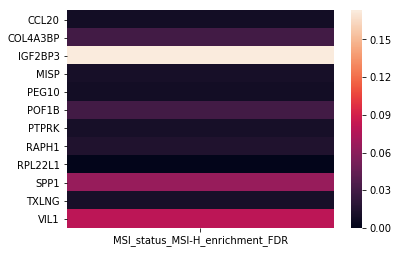

In [9]:
sns.heatmap(results_prot)
plt.show()

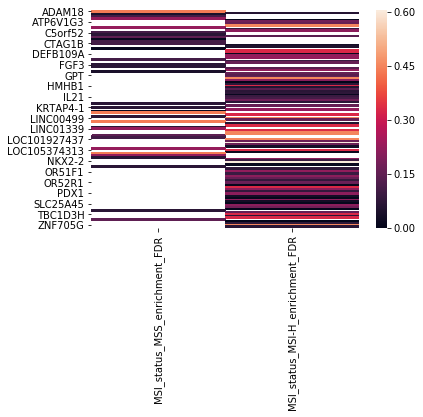

In [10]:
sns.heatmap(results_mRNA)
plt.show()

## Step 6: Determine significant enrichments, and link with cancer drug database.

In [11]:
#Check for significant columns in proteomics
print("Testing for proteomics")
for col in results_prot.columns:
    bf.significantEnrichments(results_prot, col)

#Check for significant columns in mRNA.
print("Testing for mRNA")
for col in results_mRNA.columns:
    bf.significantEnrichments(results_mRNA, col)

Testing for proteomics
9 significant protein enrichments in MSI_status_MSI-H

Testing for mRNA
5 significant protein enrichments in MSI_status_MSS

16 significant protein enrichments in MSI_status_MSI-H



In [12]:
#Store the dataframe of significant enrichments
column_MSI = 'MSI_status_MSI-H_enrichment_FDR'
column_MSS = 'MSI_status_MSS_enrichment_FDR'

sig_results_prot = bf.significantEnrichments(results_prot, 
                                             column_MSI)
sig_results_mRNA_MSI = bf.significantEnrichments(results_mRNA, 
                                                 column_MSI)
sig_results_mRNA_MSS = bf.significantEnrichments(results_mRNA, 
                                                 column_MSS)

9 significant protein enrichments in MSI_status_MSI-H

16 significant protein enrichments in MSI_status_MSI-H

5 significant protein enrichments in MSI_status_MSS



As mentioned in our paper, we see a significant upregulation in RPL22L1 within the proteomics dataset for patients with MSI-H status, however there is an inconsistency in our analysis when it comes to mRNA data **Look into this**.

In [13]:
print('RPL22L1' in sig_results_prot.index)
print('RPL22L1' in sig_results_mRNA_MSI.index) #Actual inconsistency

True
False
